<a href="https://colab.research.google.com/github/PrinceRaj1161/KrishUdemyLearning/blob/main/MiniProject3/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Creating Dataset for Experiment

X = 6 * np.random.rand(100,1) - 3
X[0:5]

array([[-1.65261504],
       [-2.45067452],
       [ 0.68002513],
       [-1.93379055],
       [-1.84008836]])

In [3]:
Y = 0.5 * X**2 + 1.5 *X + 2 + np.random.rand(100,1)
Y[0:5]

array([[1.35918013],
       [1.72972878],
       [3.58138384],
       [1.15414661],
       [1.66423012]])

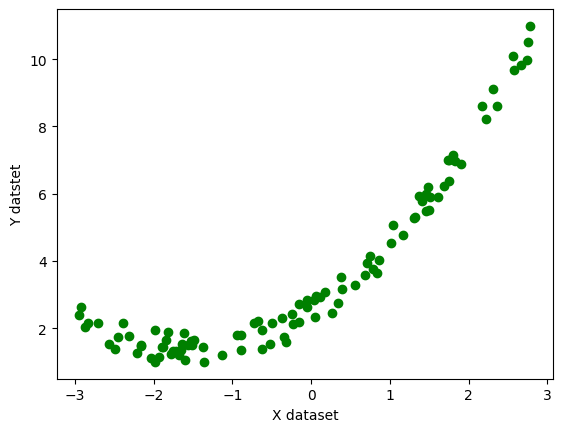

In [4]:
plt.scatter(X, Y, color="green")
plt.xlabel("X dataset")
plt.ylabel("Y datstet")
plt.show()

In [5]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

In [7]:
# Implementing Linear Regression

from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

In [8]:
model_1.fit(X_train, Y_train)

LinearRegression()

In [9]:
# Evaluating
from sklearn.metrics import r2_score

score = r2_score(Y_test, model_1.predict(X_test))
print(score)

0.81700516936848


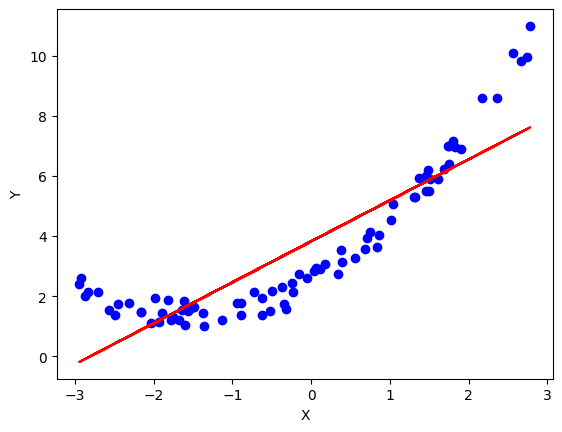

In [10]:
plt.plot(X_train, model_1.predict(X_train), color="red")
plt.scatter(X_train, Y_train, color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [11]:
# Let's apply Polynomial Transformation

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly[0:5])
print(X_test_poly[0:5])

[[ 1.         -1.12903413  1.27471807]
 [ 1.         -0.52416538  0.27474935]
 [ 1.          0.55467014  0.30765896]
 [ 1.         -1.59777531  2.55288593]
 [ 1.          0.74940238  0.56160393]]
[[ 1.          0.78653213  0.61863278]
 [ 1.          2.31351444  5.35234904]
 [ 1.          1.40398768  1.97118141]
 [ 1.         -1.87854408  3.52892786]
 [ 1.         -2.38673952  5.69652552]]


In [12]:
regression = LinearRegression()

In [13]:
regression.fit(X_train_poly, Y_train)

LinearRegression()

In [14]:
score = r2_score(Y_train, regression.predict(X_train_poly))
print(score)

0.9869691350577195


In [15]:
score = r2_score(Y_test, regression.predict(X_test_poly))
print(score)

0.9908660705944703


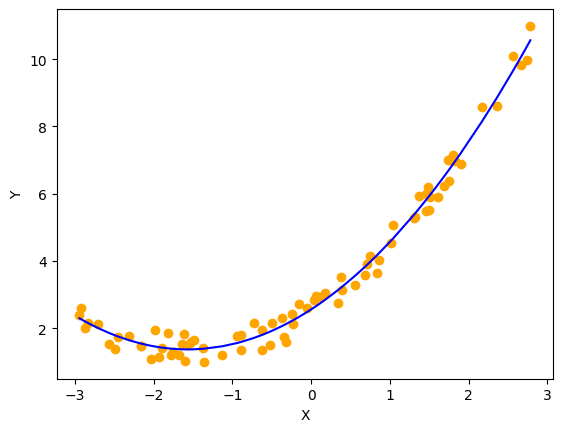

In [16]:
# We are getting very high accuracy. Let's visualize this
import seaborn as sns

plt.scatter(X_train, Y_train, color="orange")
sns.lineplot(x=X_train.ravel(), y=regression.predict(X_train_poly).ravel(), color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Testing Polynomial Features

In [17]:
"""
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[5],
              [-3],
              [9],
              [2],
              [-7]])

poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
print(X_poly)
"""

'\nimport numpy as np\nfrom sklearn.preprocessing import PolynomialFeatures\n\nX = np.array([[5],\n              [-3],\n              [9],\n              [2],\n              [-7]])\n\npoly = PolynomialFeatures(degree=7)\nX_poly = poly.fit_transform(X)\nprint(X_poly)\n'

# Pipeline

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def poly_regression(degree, X_train, Y_train):
    X_new = np.linspace(-3, 3, 200).reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()

    poly_reg = Pipeline([
        ('poly_feature', poly_features),
        ('lin_reg', lin_reg)
    ])

    poly_reg.fit(X_train, Y_train)
    y_pred_new = poly_reg.predict(X_new)

    # 🧩 Make sure data is 1D for plotting
    X_new_1d = X_new.ravel()
    y_pred_1d = y_pred_new.ravel()
    X_train_1d = np.array(X_train).ravel()
    Y_train_1d = np.array(Y_train).ravel()

    plt.figure(figsize=(8,5))
    sns.lineplot(x=X_new_1d, y=y_pred_1d, color="red", label="Model Prediction")
    plt.scatter(X_train_1d, Y_train_1d, color="blue", label="Training Data")
    plt.scatter(X_test, Y_test, color="green", label= "Testing Data")
    plt.legend()
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.show()


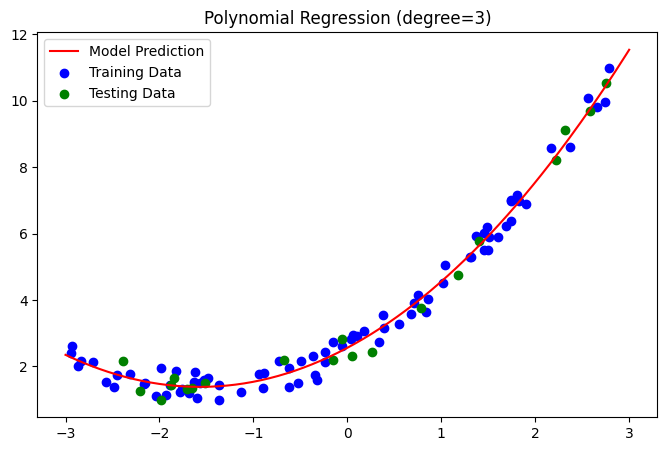

In [28]:
poly_regression(3, X_train, Y_train)

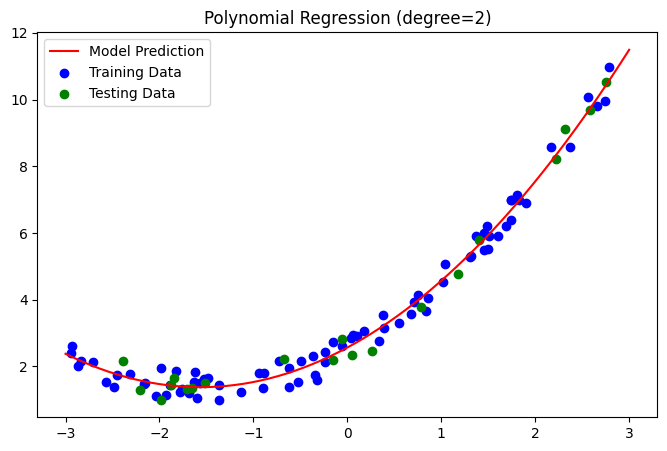

In [29]:
poly_regression(2, X_train, Y_train)

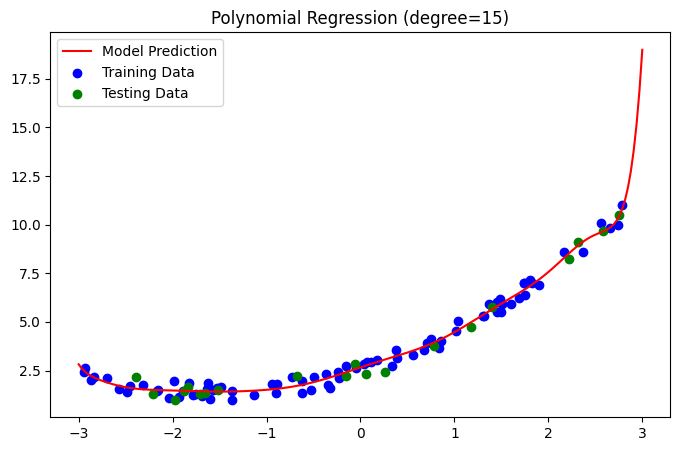

In [30]:
poly_regression(15, X_train, Y_train)